In [1]:
#Wehave to perform data analytics on a medical insurance charges dataaset. This is a filtered and modified version of the Medical Insurance Price Prediction dataset, available under the CC0 1.0 Universal License on the Kaggle website.

Insurance Cost Analysis

In [2]:
#Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [10]:
df=pd.read_csv(filepath,header=None)

In [11]:
#checking first 4 rows
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [12]:
# we can see that header are missig in data . We will create the header for our dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
#Assign Header to dataset
df.columns = headers

In [13]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [14]:
df.replace('?',np.nan ,inplace=True)

In [15]:
#Now we will do data wrangling

In [16]:
#check which column have null or nan values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [19]:
df.shape

(2772, 7)

In [20]:
# total rows are 2772 , So we can see age , smoker have null or nan value

In [21]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

In [22]:
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

In [23]:
# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [28]:
#round of charges values to 2 decimal point
df[["charges"]] = np.round(df[["charges"]],2)

In [26]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


In [27]:
df.tail()

,age,gender,bmi,no_of_children,smoker,region,charges
2767,47,1,45.320,1,0,4,8569.86
2768,21,1,34.600,0,0,3,2020.18
2769,19,2,26.030,1,1,1,16450.89
2770,23,2,18.715,0,0,1,21595.38
2771,54,2,31.600,0,0,3,9850.43


In [29]:
# Exploratory Data Analysis (EDA)

<Axes: xlabel='bmi', ylabel='charges'>

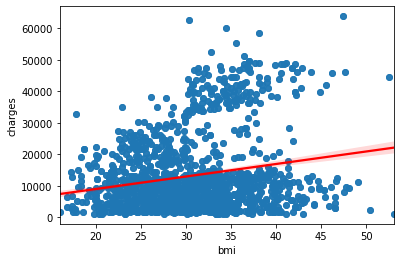

In [36]:
#Implemention of  the regression plot for charges with respect to bmi

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})


(0.0, 66902.85800000001)

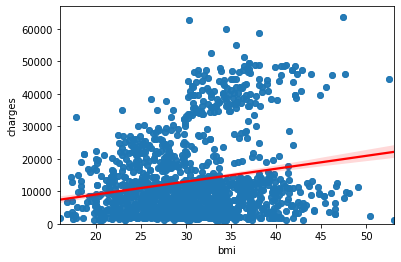

In [34]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [37]:
#Implement the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

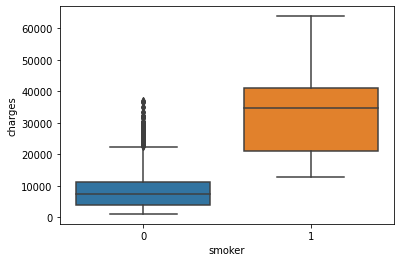

In [38]:
sns.boxplot(x="smoker", y="charges", data=df)

In [39]:
#We can also check the correlation of thr matrics 

In [40]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [41]:
#Now we will try to develop a model from the data

In [42]:
#Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the 
 #score of this model.

In [45]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression() #create an object that will help to fit dataset
lm.fit(X,Y)
print("r-square for the data is :" ,lm.score(X, Y))

r-square for the data is : 0.6221791733924185


In [46]:
lm.intercept_

8417.874393115937

In [47]:
lm.coef_

array([23805.26542958])

In [48]:
#Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the 
 #score of this model. You should see an improvement in the performance.   Multiple linear Regression

In [49]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print("r-square for the data is :" ,lm.score(Z, Y))

r-square for the data is : 0.7504083820289634


In [50]:
#r2for multiple linear regression is greater that simple linear regression , which is good

In [51]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression()
#to create a model that can predict the charges value using all the other attributes of the dataset. 
#There should be even further improvement in the performance.

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452577293925301


In [53]:
#r2 score is better

In [54]:
#Model Refinement.  Now we will try to do model refinement

In [55]:
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [57]:
Z.head()

,age,gender,bmi,no_of_children,smoker,region
0,19.0,1.0,27.900,0.0,1.0,3.0
1,18.0,2.0,33.770,1.0,0.0,4.0
2,28.0,2.0,33.000,3.0,0.0,4.0
3,33.0,2.0,22.705,0.0,0.0,1.0
4,32.0,2.0,28.880,0.0,0.0,1.0


In [58]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [59]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [60]:
#Initialize a Ridge regressor that used hyperparameter alpha = 0.1 .
#Fit the model using training data data subset. Print the  R^2  score for the testing data.


In [61]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582406


In [62]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
# score for the testing subset.

In [63]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608151
